# Nepoleon's March into Russia in 1812

** Who defeated Nepoleon? **

REF:
https://rdrr.io/cran/HistData/man/Minard.html

<img src="../VSF/imgs/Minard.png">



In [2]:
install.packages("HistData")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
library(HistData)
data(Minard.troops)

Loading required package: gridExtra
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘gridExtra’”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message:
“Removed 1 rows containing missing values (geom_text).”

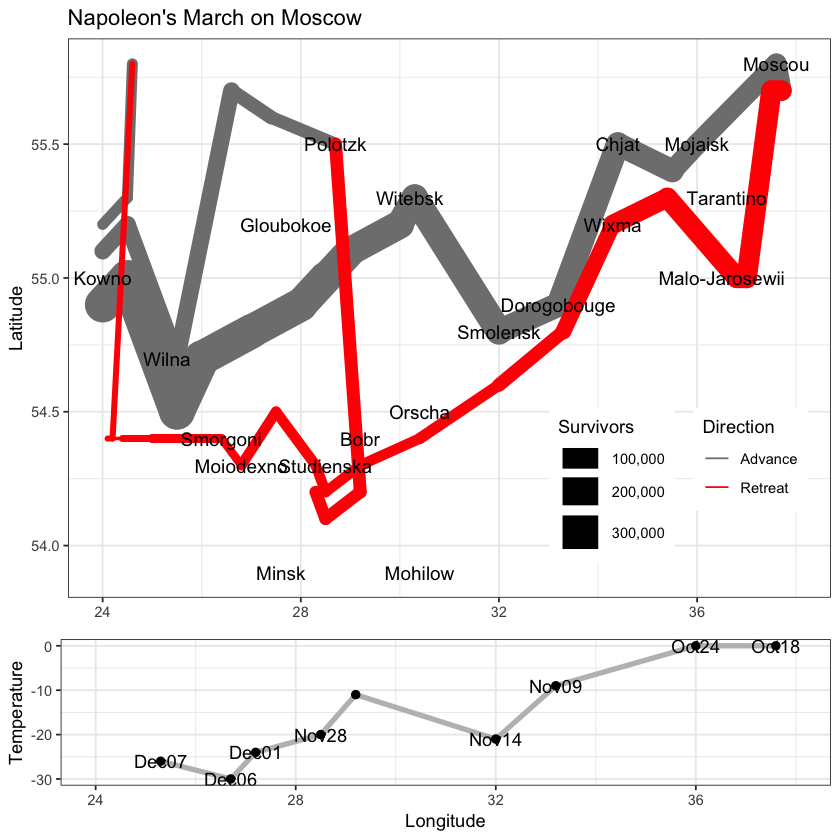

In [5]:
data(Minard.cities)
data(Minard.temp)

## Not run: 
#' ## Load required packages
require(ggplot2)
require(scales)

if(!require(gridExtra)){
    install.packages("gridExtra")
    library(gridExtra)
} else library(gridExtra)

#' ## plot path of troops, and another layer for city names
 plot_troops <- ggplot(Minard.troops, aes(long, lat)) +
		geom_path(aes(size = survivors, colour = direction, group = group),
                 lineend = "round", linejoin = "round")
 plot_cities <- geom_text(aes(label = city), size = 4, data = Minard.cities)
 
#' ## Combine these, and add scale information, labels, etc.
#' Set the x-axis limits for longitude explicitly, to coincide with those for temperature

breaks <- c(1, 2, 3) * 10^5 
plot_minard <- plot_troops + plot_cities +
 	scale_size("Survivors", range = c(1, 10), 
 	            breaks = breaks, labels = scales::comma(breaks)) +
  scale_color_manual("Direction", 
                     values = c("grey50", "red"), 
                     labels=c("Advance", "Retreat")) +
  coord_cartesian(xlim = c(24, 38)) +
  xlab(NULL) + 
  ylab("Latitude") + 
  ggtitle("Napoleon's March on Moscow") +
  theme_bw() +
  theme(legend.position=c(.8, .2), legend.box="horizontal")
 
#' ## plot temperature vs. longitude, with labels for dates
plot_temp <- ggplot(Minard.temp, aes(long, temp)) +
	geom_path(color="grey", size=1.5) +
	geom_point(size=2) +
	geom_text(aes(label=date)) +
	xlab("Longitude") + ylab("Temperature") +
	coord_cartesian(xlim = c(24, 38)) + 
	theme_bw()
	

#' The plot works best if we  re-scale the plot window to an aspect ratio of ~ 2 x 1
# windows(width=10, height=5)

#' Combine the two plots into one
grid.arrange(plot_minard, plot_temp, nrow=2, heights=c(3,1))
